# Windowed Scalogram

This is from the new package still being developed called wavScalogram. It is an R package for time series analysis using the Wavelet Scalogram see the github [link](https://github.com/rbensua/wavScalogram) for more details. 

In [1]:
# R package which includes Quantitative Financial Modelling Frameworks.
#https://www.rdocumentation.org/packages/quantmod
#install.packages("quantmod")
require(quantmod)

# An R Package of time series tools and utilities; Rmetrics - Financial Time Series Objects
#https://www.rdocumentation.org/packages/timeSeries
#install.packages("timeSeries")
require(timeSeries)

# devtools: Tools to Make Developing R Packages Easier 
#https://www.rdocumentation.org/packages/devtools
#install.packages("devtools")
require(devtools) # using devtools to download from github 

# R package for time series analysis using the Wavelet Scalogram 
# from https://github.com/rbensua/wavScalogram
#install_github("rbensua/wavScalogram")
require(wavScalogram)

Loading required package: quantmod
Loading required package: xts
Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: TTR
Version 0.4-0 included new data defaults. See ?getSymbols.
Loading required package: timeSeries
Loading required package: timeDate

Attaching package: 'timeSeries'

The following object is masked from 'package:zoo':

    time<-

Loading required package: devtools
Loading required package: wavScalogram


In [2]:
# Identify the tickers of interest
tickers <- c("CGW","XLE", "SPY")
# Download these tickers from Yahoo for the dates in the presentation
getSymbols(tickers,src="yahoo", from = "2007-06-01",to = "2018-01-26")
# Merge all the Price series into one dataframe
AllPrices <- do.call(merge, lapply(tickers, function(x) get(x)))

#Some of these series have (NA) missing values for dates when others 
# do not have missiong vaulesin the series so we interpolate for these values
AllPrices$CGW.Close <- interpNA(AllPrices$CGW.Close)
AllPrices$XLE.Close <- interpNA(AllPrices$XLE.Close)
AllPrices$SPY.Close <- interpNA(AllPrices$SPY.Close)

                                   #Set up the correct data frame
rCGW <- as.data.frame((AllPrices$CGW.Close))
rXLE <- as.data.frame((AllPrices$XLE.Close))
rSPY <- as.data.frame((AllPrices$SPY.Close))

#Retrieve specific dates
date1 <- index(AllPrices)
#save Prices in Matrix
rW <- cbind(1:(length(AllPrices$CGW.Close)), rCGW$CGW.Close[1: length(AllPrices$CGW.Close)])
rE <- cbind(1:(length(AllPrices$XLE.Close)), rXLE$XLE.Close[1: length(AllPrices$XLE.Close)])
rS <- cbind(1:(length(AllPrices$SPY.Close)), rSPY$SPY.Close[1: length(AllPrices$SPY.Close)])

'getSymbols' currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
'loadSymbols' to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once per session and may be disabled by setting 
options("getSymbols.warning4.0"=FALSE). See ?getSymbols for details.


Please see the Warning section of '?getSymbols.yahoo' for details.

This message is shown once per session and may be disabled by setting
options("getSymbols.yahoo.warning"=FALSE).


[1] "CGW" "XLE" "SPY"

Loading required package: abind
Loading required package: Matrix


[1] "Montecarlo..."


Loading required package: parallel


[1] "Computing significance contours..."


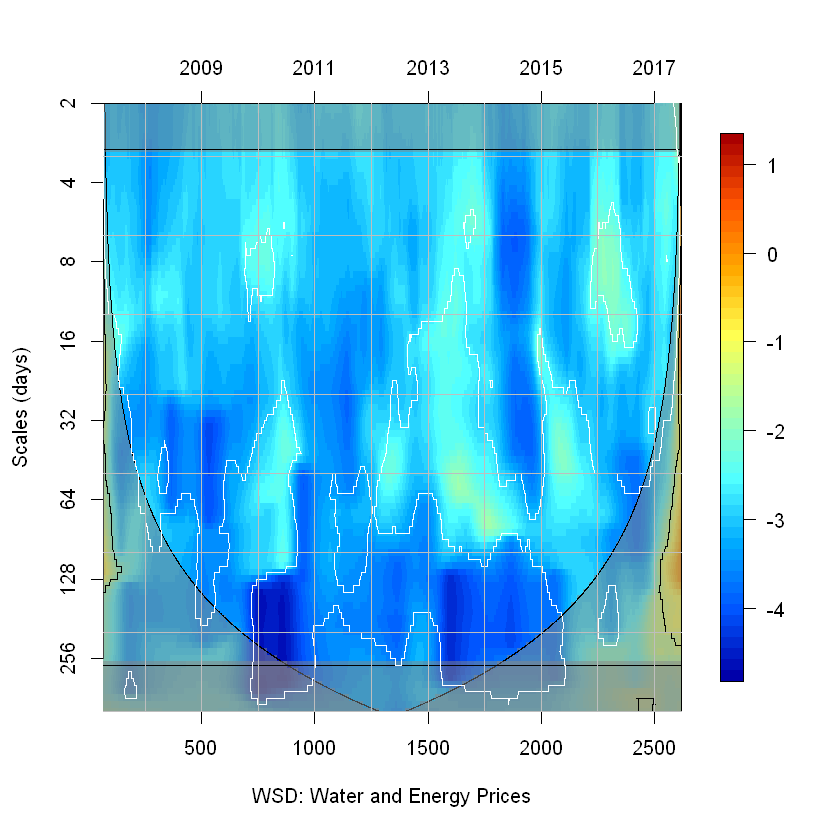

In [3]:
# Parameters
wname <- "MORLET"
dt <- 1
delta_t <- 1
nt <- length(rW)/2 # number of time points
t <- 1:nt # time vector

nrand <- 10  # MonteCarlo repetitions (for significance contours)
windowrad <- 64 #floor(nt/60); # % time radius for windowed scalogram (width)
rdist <- floor(nt/300); # % Scale radius for distance (height)

# Defining the scales (Torrence and Compo's way)
s0 <- 2*dt
Dj <- 12
waverad <- 3 # Morlet wavelet radius
smax <- (nt-1-2*windowrad)/(2*waverad)
scales <- c(s0, smax, Dj)

#Find Help here
#?wsd
#?wavPlot

# This function computes the Windowed Scalogram Difference of two signals. 
# The definition and details can be found in (Bolós et al. 2017).

wsd <- wsd(signal1 = rW[,2], signal2 = rE[,2], scaleparam = scales, delta_t = 1, 
           windowrad = windowrad, rdist = rdist, mc_nrand = nrand, wname = "MORLET", 
           parallel = TRUE, makefigure = FALSE)

#Plotting the WSD
wavPlot(Z = -log2(wsd$wsd), X = wsd$t, Y = wsd$scales, Ylog = TRUE, coi = wsd$coi, 
        rdist = wsd$rdist, sig95 = wsd$signif95, sig05 = wsd$signif05, Xname = "WSD: Water and Energy Prices", 
        Yname ="Scales (days)", Zname = " ")
axis(3, at =  c(0,500, 1000, 1500, 2000, 2500),labels=c("2007", "2009", "2011", "2013","2015", "2017"))
n = length(rW[, 1])
abline(v = seq(250, n, 250), h = 1:16, col = "grey", lty = 1, lwd = 1)


# References:

C. Torrence, G. P. Compo. A practical guide to wavelet analysis. B. Am. Meteorol. Soc. 79 (1998), 61–78.

V. J. Bolós, R. Benítez, R. Ferrer, R. Jammazi. The windowed scalogram difference: a novel wavelet tool for comparing time series. Appl. Math. Comput., 312 (2017), 49-65.